<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/featurebranch/Knn_with_selectKbest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import nessary libraries
# project is to predicting the brest cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#get the CSV Data here and print header
# GitHub raw file URL
# Replace the space with '%20' or use proper URL encoding
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/breast%20cancer.csv"
# Read the CSV file
df = pd.read_csv(url)
df.head()

In [ ]:
#print sumary
print('Shape ..............>',df.shape)

Shape ..............> (569, 33)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Drop ALERT 1 : Unnamed:32 column has all nulls safe to remove the column
df = df.drop(['Unnamed: 32'],axis=1)

In [ ]:
#data frame statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Seems no other cols have nulls ,it's safe proceed

In [ ]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

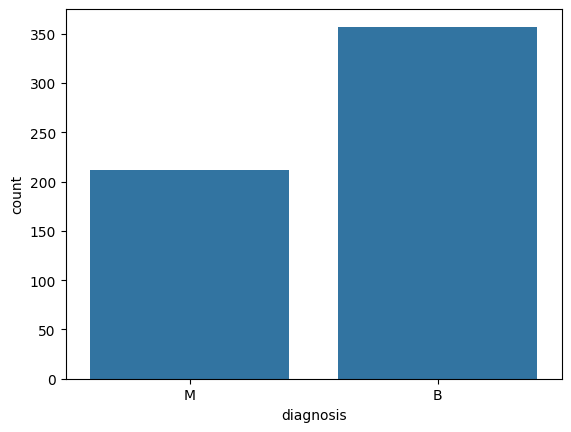

In [ ]:
#Plot each class frequency
sns.countplot(x= 'diagnosis',data=df)
plt.show()

In [ ]:
df.shape

(569, 32)

**Using 'Select K Best' feature selection method**

select Best use **f_class** if function find best features where f_classif users **ANOVA** test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Anava test will ,first Fscore is the top score and 2nd FScore is second top ...etc

In [ ]:
#Replace Label column (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [ ]:
x = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [ ]:
best_features = SelectKBest(score_func=f_classif,k=17) #to tell that above ANOVA i.e f_classif

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_) #find the score

df_columns = pd.DataFrame(x.columns)

# Concatenate dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns = ['Feature_name','Score'] # Name output Columns
print(feature_scores.nlargest(20,'Score')) # print 17 best features

            Feature_name       Score
28  concave points_worst  964.385393
23       perimeter_worst  897.944219
8    concave points_mean  861.676020
21          radius_worst  860.781707
3         perimeter_mean  697.235272
24            area_worst  661.600206
1            radius_mean  646.981021
4              area_mean  573.060747
7         concavity_mean  533.793126
27       concavity_worst  436.691939
6       compactness_mean  313.233079
26     compactness_worst  304.341063
11             radius_se  268.840327
13          perimeter_se  253.897392
14               area_se  243.651586
22         texture_worst  149.596905
25      smoothness_worst  122.472880
29        symmetry_worst  118.860232
2           texture_mean  118.096059
18     concave points_se  113.262760


In [ ]:
print(feature_scores.nlargest(22,'Score')) # print 22 best features

            Feature_name       Score
28  concave points_worst  964.385393
23       perimeter_worst  897.944219
8    concave points_mean  861.676020
21          radius_worst  860.781707
3         perimeter_mean  697.235272
24            area_worst  661.600206
1            radius_mean  646.981021
4              area_mean  573.060747
7         concavity_mean  533.793126
27       concavity_worst  436.691939
6       compactness_mean  313.233079
26     compactness_worst  304.341063
11             radius_se  268.840327
13          perimeter_se  253.897392
14               area_se  243.651586
22         texture_worst  149.596905
25      smoothness_worst  122.472880
29        symmetry_worst  118.860232
2           texture_mean  118.096059
18     concave points_se  113.262760
5        smoothness_mean   83.651123
9          symmetry_mean   69.527444


# **Model Building **

In [ ]:
new_X = df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','compactness_mean','compactness_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst','symmetry_worst','texture_mean','concave points_se']]

In [ ]:
new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,compactness_mean,...,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst,symmetry_worst,texture_mean,concave points_se
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.27760,...,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220,0.4601,10.38,0.01587
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.07864,...,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380,0.2750,17.77,0.01340
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.15990,...,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440,0.3613,21.25,0.02058
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.28390,...,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980,0.6638,20.38,0.01867
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.13280,...,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740,0.2364,14.34,0.01885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.11590,...,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100,0.2060,22.39,0.02454
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.10340,...,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660,0.2572,28.25,0.01678
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.10230,...,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390,0.2218,28.08,0.01557
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.27700,...,0.27700,0.86810,0.7260,5.772,86.22,39.42,0.16500,0.4087,29.33,0.01664


In [ ]:
new_X.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,compactness_mean,...,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst,symmetry_worst,texture_mean,concave points_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104,0.088799,0.104341,...,0.104341,0.254265,0.405172,2.866059,40.337079,25.677223,0.132369,0.290076,19.289649,0.011796
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129,0.079720,0.052813,...,0.052813,0.157336,0.277313,2.021855,45.491006,6.146258,0.022832,0.061867,4.301036,0.006170
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000,0.000000,0.019380,...,0.019380,0.027290,0.111500,0.757000,6.802000,12.020000,0.071170,0.156500,9.710000,0.000000
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000,0.029560,0.064920,...,0.064920,0.147200,0.232400,1.606000,17.850000,21.080000,0.116600,0.250400,16.170000,0.007638
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000,0.061540,0.092630,...,0.092630,0.211900,0.324200,2.287000,24.530000,25.410000,0.131300,0.282200,18.840000,0.010930
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000,0.130700,0.130400,...,0.130400,0.339100,0.478900,3.357000,45.190000,29.720000,0.146000,0.317900,21.800000,0.014710
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000,0.426800,0.345400,...,0.345400,1.058000,2.873000,21.980000,542.200000,49.540000,0.222600,0.663800,39.280000,0.052790


In [ ]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

In [ ]:
#Building model to test unexposed data
x_train, x_test, y_train, y_test = train_test_split(X_scalar, y, test_size=0.25, random_state=355)

In [ ]:
# Write one function and call as manu as times to check accuracy_score of different models
def metrix_score(clf, x_train, x_test,Y_train,y_test, train = True):
  if train:
    y_pred = clf.predict(x_train)
    print("\n *************Train result ***************")
    print(f"accuracy Score: {accuracy_score(y_train, y_pred) * 100: .2f}%")
  elif train==False:
    pred = clf.predict(x_test)
    print("\n *************Test result ***************")
    print(f"accuracy Score: {accuracy_score(y_test, pred) * 100: .2f}%")
    print('\n \n test Classificaiton Report \n', classification_report(y_test, pred))

In [ ]:
#Initiate KNeighborsClassifier
knn = KNeighborsClassifier()

#model Training
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#call the function and pass the dataset to check train and test score
metrix_score(knn,x_train,x_test,y_train,y_test,train=True) # this is for training score
metrix_score(knn,x_train,x_test,y_train,y_test,train=False) # this is for testing score


 *************Train result ***************
accuracy Score:  97.42%

 *************Test result ***************
accuracy Score:  95.10%

 
 test Classificaiton Report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        93
           1       0.98      0.88      0.93        50

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



If we have low result , wehave to find the improvement the score. but here we got good result near 97.42% and test result also near to Train result .

still we have any chance we have to improve the accuracy using different tools

**Cross-validation** is a technique used to evaluate the performance of a machine learning model by splitting the dataset into multiple subsets, or folds. The model is trained on some folds and tested on others, iteratively. This helps to assess how well the model generalizes to unseen data and provides a more reliable estimate of its performance.

**Regarding improving the model result when it has low accuracy, here are some strategies you can consider:**

**Feature Engineering**: Sometimes, the problem lies in the features used for training. You can try adding new features, removing irrelevant ones, or transforming existing features to make them more informative.

**Hyperparameter Tuning**: Adjusting the hyperparameters of the model can significantly impact its performance. Techniques like grid search or random search can help you find the optimal combination of hyperparameters.

**Model Selection**: If one model is not performing well, try using a different algorithm. Not all algorithms are suitable for all types of data, so experimenting with different models can lead to better results.

**Ensemble Methods**: Ensemble methods combine multiple models to improve performance. Techniques like bagging (e.g., Random Forests) and boosting (e.g., Gradient Boosting Machines) can often improve accuracy compared to using a single model.

**Cross-Validation:** Ensure that you are using cross-validation properly to get a reliable estimate of the model's performance. Sometimes, low accuracy on the training set can be due to overfitting, and cross-validation can help detect this issue.

**More Data:** Increasing the size of the dataset can sometimes lead to better performance, especially if the model is underfitting due to lack of data.

**Regularization:** Regularization techniques like L1 and L2 regularization can help prevent overfitting by penalizing complex models.

**Error Analysis:** Analyze the errors made by the model to understand its weaknesses better. This can provide insights into what aspects of the data the model is struggling with and how to improve it.

**lets see the different approhes of cross validation **

**The holdout method** is one of the simplest techniques for evaluating the performance of a machine learning model. It involves splitting the dataset into two subsets: a training set and a testing set. The model is trained on the training set and then evaluated on the testing set to assess its performance.

Here's how the holdout method typically works:

Data Splitting: The dataset is randomly divided into two disjoint subsets: the training set and the testing set. The training set is used to train the model, while the testing set is used to evaluate its performance.

Training: The model is trained on the training set using the available features and corresponding labels.

Testing: Once the model is trained, it is evaluated on the testing set by making predictions on the features in the testing set and comparing them to the actual labels.

Performance Evaluation: Various performance metrics, such as accuracy, precision, recall, F1-score, etc., can be calculated based on the model's predictions and the actual labels in the testing set.

Generalization Assessment: The performance metrics obtained from the testing set provide an estimate of how well the model generalizes to unseen data.

Iterative Process: This process can be repeated multiple times with different random splits of the data to get a more robust estimate of the model's performance, especially if the dataset is small.

**K-fold cross-validation **is a popular technique used to evaluate the performance of a machine learning model. It provides a more robust estimate of the model's performance compared to the simple holdout method. Here's how k-fold cross-validation works:

Data Splitting: The dataset is divided into k subsets, or folds, of approximately equal size.

Training and Validation: The model is trained k times, each time using k-1 folds as the training data and the remaining fold as the validation data. This means that each fold is used as the validation set exactly once.

Performance Evaluation: After training the model k times, the performance metrics (e.g., accuracy, precision, recall, etc.) are averaged over the k validation sets to obtain a single performance estimate.

Generalization Assessment: The final performance estimate provides a more reliable measure of how well the model generalizes to unseen data compared to a single train-test split.

Iterative Process: This process is often repeated multiple times with different random splits of the data to get a more stable estimate of the model's performance.

K-fold cross-validation helps to address some of the limitations of the holdout method by using multiple splits of the data for training and testing. It provides a more comprehensive assessment of the model's performance and is particularly useful when the dataset is relatively small or when the performance estimate needs to be more reliable.

Common choices for the value of k include 5-fold and 10-fold cross-validation, although other values can also be used depending on the specific dataset and computational resources available. Keep in mind that as the value of k increases, the computational cost of cross-validation also increases, as the model needs to be trained and evaluated more times.


The k-fold cross-validation process can be summarized with the following steps:

Data Splitting: Divide the dataset into k roughly equal-sized folds.

Training and Validation: For each iteration

i from 1 to

k:

Use the

i-th fold as the validation set.
Use the remaining folds as the training set.
Train the model on the training set.
Validate the model on the validation set.
Performance Evaluation: Compute the performance metric (e.g., accuracy, error rate, etc.) for each fold.

Performance Aggregation: Calculate the average performance metric across all

k folds to obtain an overall estimate of the model's performance.

Mathematically, you can represent this process with the following formula for computing the performance metric:

Performance = 1\k ∑k, i=1 Performance(i)


where:


k is the number of folds.
Performance

Performance
i

  is the performance metric (e.g., accuracy) obtained on the

i-th fold.
This formula represents the average performance over all

k folds, providing a more reliable estimate of the model's performance compared to a single train-test split.

**this is very cosliest method **


**Leave one out Cross validation -LOOCV**
Leave-one-out cross-validation (LOOCV) is a special case of k-fold cross-validation where

k is set equal to the number of samples in the dataset. In LOOCV, the dataset is split into

n subsets, where

n is the number of samples, and each subset contains exactly one sample.

Here's how LOOCV works:

Iteration: For each sample in the dataset:

Use the current sample as the validation set.
Use the remaining
n−1 samples as the training set.
Train the model on the training set.
Validate the model on the validation set (single sample).
Compute the performance metric (e.g., accuracy, error rate) for the current iteration.
Performance Evaluation: Compute the performance metric for each iteration.

Performance Aggregation: Calculate the average performance metric across all
 iterations to obtain an overall estimate of the model's performance.

Cross validation score to check if the model is overfitting

In [ ]:
from  sklearn.model_selection import cross_val_score
cross_val_score(knn, X_scalar, y,cv=5)


array([0.95614035, 0.92982456, 0.99122807, 0.96491228, 0.94690265])

In [ ]:
cross_val_score(knn, X_scalar, y,cv=5).mean()

0.9578015836050303

**The bias-variance tradeoff** is a fundamental concept in machine learning that deals with finding the right balance between bias and variance to achieve optimal model performance.

Bias: Bias refers to the error introduced by approximating a real-world problem with a simplified model. A high bias model makes strong assumptions about the form of the underlying data distribution, which may cause it to overlook relevant patterns in the data. High bias models are typically less complex and may underfit the data.

Variance: Variance refers to the model's sensitivity to small fluctuations or noise in the training data. A high variance model is highly flexible and can capture complex patterns in the data, but it may also capture noise and result in poor generalization to unseen data. High variance models are prone to overfitting.

Finding the right balance between bias and variance is crucial for building models that generalize well to unseen data. Here's how the bias-variance tradeoff works:

High Bias, Low Variance:

Models with high bias and low variance are simple and make strong assumptions about the data.
They tend to underfit the training data, capturing only the most obvious patterns while ignoring more complex relationships.
Examples include linear models or models with few parameters.
Low Bias, High Variance:

Models with low bias and high variance are complex and flexible.
They can capture intricate patterns in the training data, including noise.
However, they may overfit the training data and perform poorly on unseen data.
Examples include decision trees with no depth restrictions or high-degree polynomial models.
Balancing Bias and Variance:

The goal is to find a model that achieves a good tradeoff between bias and variance.
This often involves adjusting the complexity of the model (e.g., adding regularization, adjusting hyperparameters) to reduce overfitting without increasing underfitting.
Techniques like cross-validation can help assess a model's bias and variance and guide the selection of the appropriate model complexity.

**Hyper Perameter Tuning**


Hyperparameter tuning is the process of selecting the optimal set of hyperparameters for a machine learning model. Hyperparameters are parameters that are set before the learning process begins and control the learning process itself, rather than being learned from the data. Examples of hyperparameters include the learning rate in gradient descent, the number of layers in a neural network, or the depth of a decision tree.

**Here's a basic outline of the hyperparameter tuning process:**

Define Hyperparameters: Identify the hyperparameters of the model that need to be tuned. These are parameters that are not learned from the data but are set before training begins.

Choose a Search Space: Determine the range of values or distributions for each hyperparameter that you want to explore during the tuning process.

Select a Search Method: Decide on a search strategy to explore the hyperparameter space. Common search methods include grid search, random search, Bayesian optimization, and more advanced optimization algorithms.

Train and Validate Models: For each combination of hyperparameters:

Train the model on the training data using the specified hyperparameters.
Validate the model on a separate validation set or using cross-validation to estimate its performance.
Compute a performance metric (e.g., accuracy, loss) for each combination of hyperparameters.
Select the Best Model: Choose the set of hyperparameters that result in the best performance on the validation set.

Evaluate on Test Set: Finally, evaluate the selected model with the best hyperparameters on a separate test set to obtain an unbiased estimate of its performance.




**here are several techniques for hyperparameter tuning, each with its own advantages and disadvantages. Here are some of the most commonly used techniques:**

**Grid Search:** In grid search, you define a grid of hyperparameter values to search over. The algorithm then evaluates the model's performance for each combination of hyperparameters in the grid. Grid search is simple and exhaustive but can be computationally expensive, especially for large search spaces.

**Random Search:** Random search randomly samples hyperparameter values from predefined distributions. Unlike grid search, which evaluates all possible combinations, random search explores the search space more efficiently. It is less computationally intensive than grid search and often finds good hyperparameter configurations faster.

**Bayesian Optimization:** Bayesian optimization uses probabilistic models to model the objective function (e.g., validation accuracy) and decides where to sample next based on these models. It tends to perform well with a limited number of iterations and is efficient at finding good hyperparameter configurations.

**Evolutionary Algorithms:** Evolutionary algorithms, such as genetic algorithms, mimic the process of natural selection to search for optimal hyperparameter configurations. They maintain a population of candidate solutions and iteratively evolve them over multiple generations. Evolutionary algorithms can handle complex search spaces and are less sensitive to noisy evaluations.

**Gradient-Based Optimization:** Gradient-based optimization methods, such as gradient descent, optimize hyperparameters by computing gradients of the objective function with respect to the hyperparameters. These methods require the objective function to be differentiable with respect to the hyperparameters. They can be efficient for tuning a small number of continuous hyperparameters.

**Ensemble Methods: ** Ensemble methods combine multiple models trained with different hyperparameter configurations to improve performance. Instead of selecting a single set of hyperparameters, ensemble methods leverage the diversity of models to achieve better generalization. Techniques like random forests or gradient boosting are examples of ensemble methods.

**Automated Hyperparameter Tuning Libraries:** There are several libraries and frameworks available that automate the hyperparameter tuning process, such as Hyperopt, Optuna, and scikit-optimize. These libraries provide user-friendly interfaces and implement various hyperparameter optimization algorithms.

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the KNN classifier
#knn = KNeighborsClassifier()

In [ ]:
# Define the parameter grid
param_grid = {
    'algorithm': ['kd_tree', 'brute'],  # algorithm to compute the nearest neighbors
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # values for the number of neighbors
    'leaf_size': ['3,5,6,7,8']  # weight functions for prediction

}

In [ ]:
# Perform grid search
gridsearch = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [3, 5, 7, 9]})
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [ ]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [ ]:
# Get the best parameters and best score
best_params = gridsearch.best_params_


In [ ]:
best_score = gridsearch.best_score_

In [ ]:
# Train the model with the best parameters
best_knn = gridsearch.best_estimator_
best_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [ ]:
gridsearch.best_score_

0.9647879616963065

In [ ]:
gridsearch.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# we will use the best perameter in our k-nn algorithm nd check if accuracy is increasing
knn = KNeighborsClassifier(algorithm='kd_tree',leaf_size =3, n_neighbors=3)


In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [ ]:
#Call the function and pass dataset to check train and test score
metrix_score(knn,x_train,x_test,y_train,y_test,train=True) #This is for training Score

metrix_score(knn,x_train,x_test,y_train,y_test,train=False)# This is for testing score


 *************Train result ***************
accuracy Score:  98.12%

 *************Test result ***************
accuracy Score:  95.80%

 
 test Classificaiton Report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        93
           1       0.98      0.90      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
#if you want to check the confussion matrix you can check
y_pred = knn.predict(x_test) # we are predicting once again becuase variables inside the function are local varaibles
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[92,  1],
       [ 5, 45]])